In [1]:
#Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading The Dataset
df = pd.read_csv("/content/drive/MyDrive/ProjectFinal/heart_disease.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,thalach,exang,ca,thal,target
0,63,1,3,145,150,0,0,1,1
1,37,1,2,130,187,0,0,2,1
2,41,0,1,130,172,0,0,2,1
3,56,1,1,120,178,0,0,2,1
4,57,0,0,120,163,1,0,2,1


In [5]:
print("Shape of Dataset:", df.shape)

Shape of Dataset: (303, 9)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       303 non-null    int64
 1   sex       303 non-null    int64
 2   cp        303 non-null    int64
 3   trestbps  303 non-null    int64
 4   thalach   303 non-null    int64
 5   exang     303 non-null    int64
 6   ca        303 non-null    int64
 7   thal      303 non-null    int64
 8   target    303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


In [7]:
# Examining Missing Values
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
thalach     0
exang       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)

pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trestbps,0
thalach,0
exang,0
ca,0
thal,0
target,0


In [9]:
#  Examining Unique Values
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
df["cp"].value_counts().sum()

303

In [11]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
age,41
sex,2
cp,4
trestbps,49
thalach,91
exang,2
ca,5
thal,4
target,2


In [12]:
#  Separating variables (Numeric or Categorical)
numeric_var =["age", "trestbps","thalach"]
categoric_var =["sex", "cp", "exang", "ca", "thal", "target"]


In [13]:
# Examining Statistics of Variables
df[numeric_var].describe()

,age,trestbps,thalach
count,303.000000,303.000000,303.000000
mean,54.366337,131.623762,149.646865
std,9.082101,17.538143,22.905161
min,29.000000,94.000000,71.000000
25%,47.500000,120.000000,133.500000
50%,55.000000,130.000000,153.000000
75%,61.000000,140.000000,166.000000
max,77.000000,200.000000,202.000000


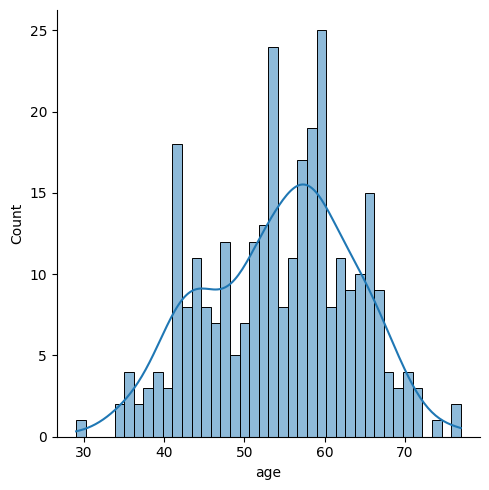

In [14]:
# "age" variable
sns.displot(data = df, x="age",bins= 40, kde = True);

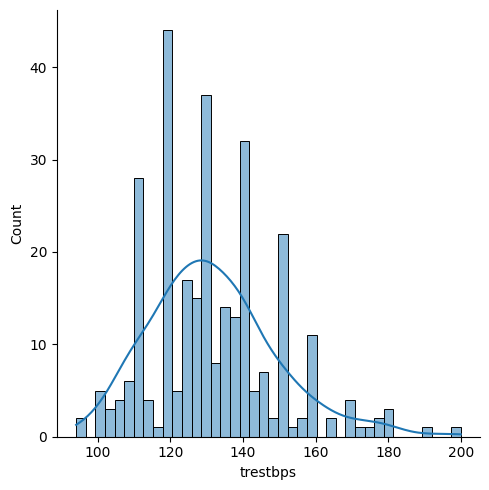

In [15]:
# "trestbps" variable
sns.displot(data = df, x="trestbps",bins= 40, kde = True);

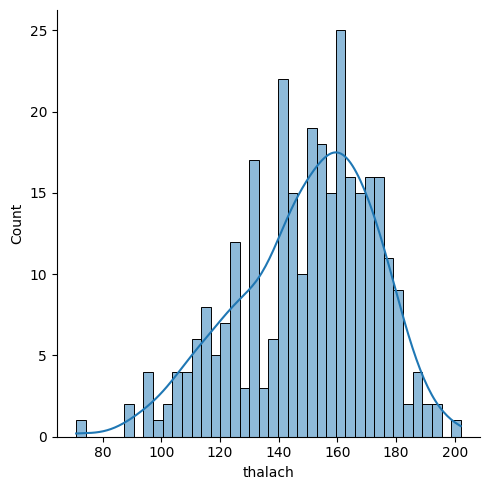

In [16]:
# "thalach" variable
sns.displot(data = df, x="thalach",bins= 40, kde = True);

In [17]:
#  Exploratory Data Analysis(EDA)
# Numerical Variables(Analysis with Displot)
numeric_var

['age', 'trestbps', 'thalach']

In [18]:
numeric_axis_name =["Age of the Patient", "Resting Blood Pressure", "Maximum Heart Rate Achieved"]


In [19]:
list(zip(numeric_var, numeric_axis_name))


[('age', 'Age of the Patient'),
 ('trestbps', 'Resting Blood Pressure'),
 ('thalach', 'Maximum Heart Rate Achieved')]

<Figure size 640x480 with 0 Axes>

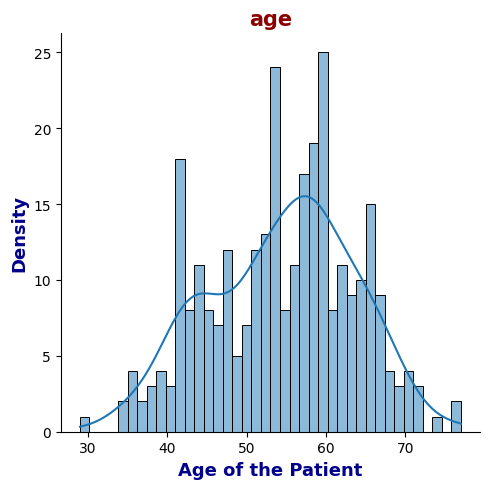

<Figure size 640x480 with 0 Axes>

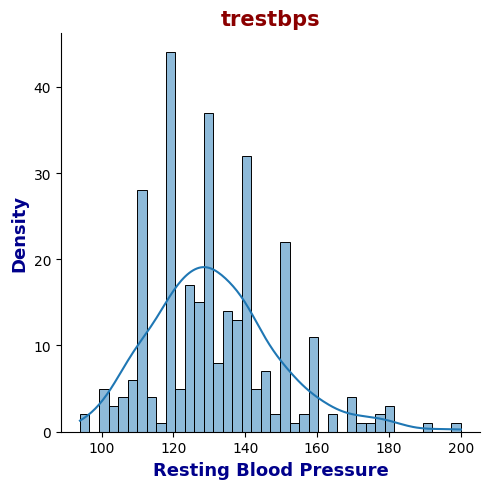

<Figure size 640x480 with 0 Axes>

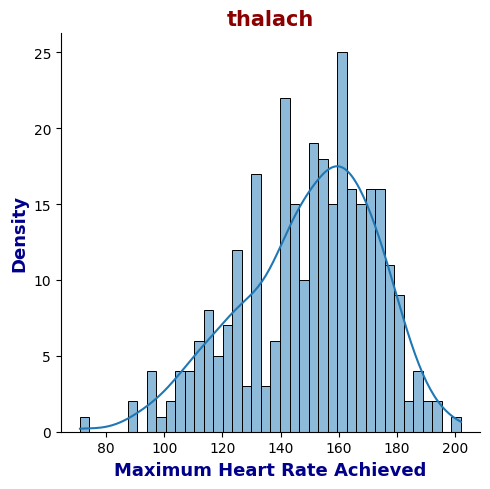

In [20]:
title_font = { "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = { "color" : "darkblue", "weight" : "bold", "size" : 13}
for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8, 6), dpi = 80);
    sns.displot(df[i],bins=40, kde = True);
    plt.title(i, fontdict = title_font);
    plt.xlabel(z, fontdict = axis_font);
    plt.ylabel("Density", fontdict = axis_font);
    plt.tight_layout();
    plt.show();


In [21]:
# Categorical Variables(Analysis with Pie Chart)
categoric_var


['sex', 'cp', 'exang', 'ca', 'thal', 'target']

In [22]:
categoric_axis_name = ["Gender", "Chest Pain Type", "Exercise Induced Angina","Number of Major Vessels", "Thal", "Target"]

In [23]:
list(zip(categoric_var, categoric_axis_name))


[('sex', 'Gender'),
 ('cp', 'Chest Pain Type'),
 ('exang', 'Exercise Induced Angina'),
 ('ca', 'Number of Major Vessels'),
 ('thal', 'Thal'),
 ('target', 'Target')]

In [24]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [25]:
list(df["cp"].value_counts())

[143, 87, 50, 23]

In [26]:
list(df["cp"].value_counts().index)

[0, 2, 1, 3]

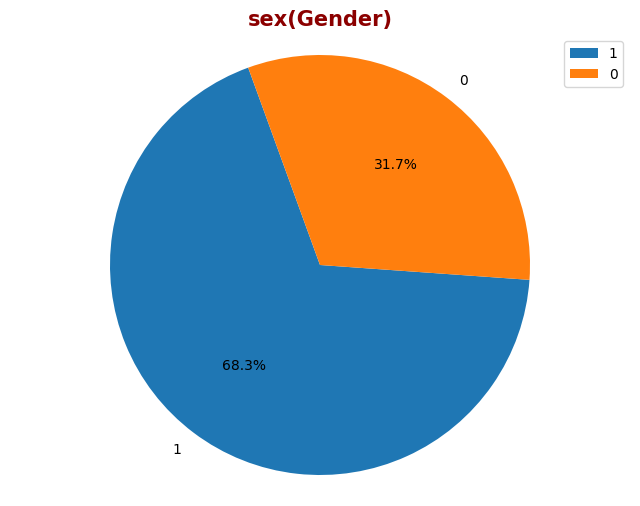

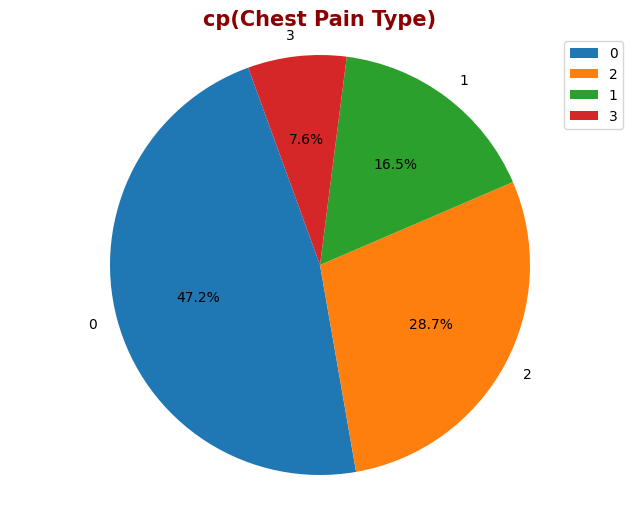

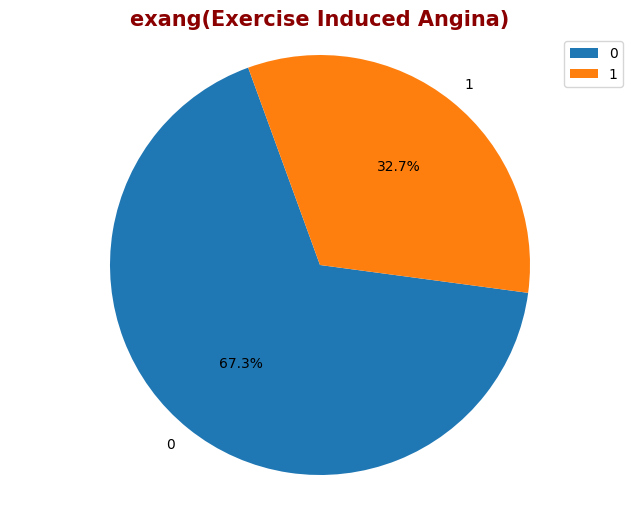

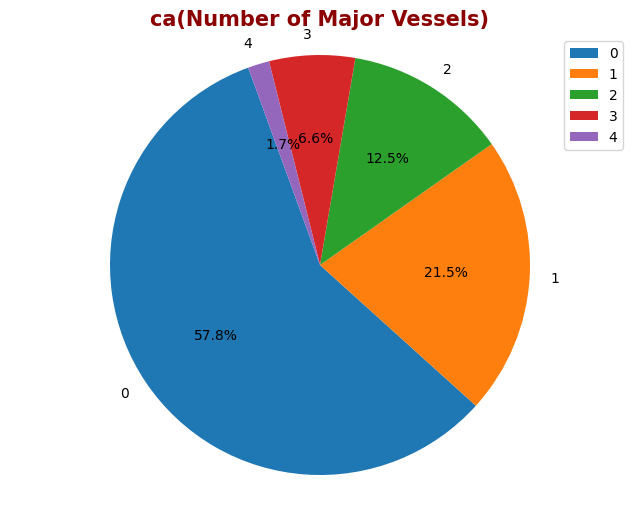

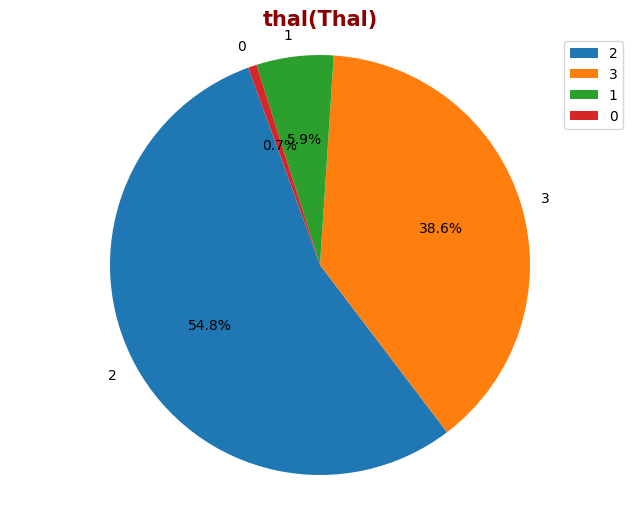

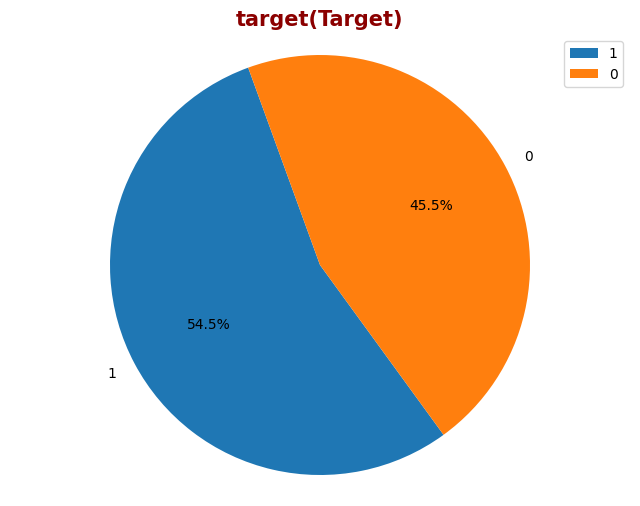

In [27]:
title_font = {"color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))

    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((i + "(" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

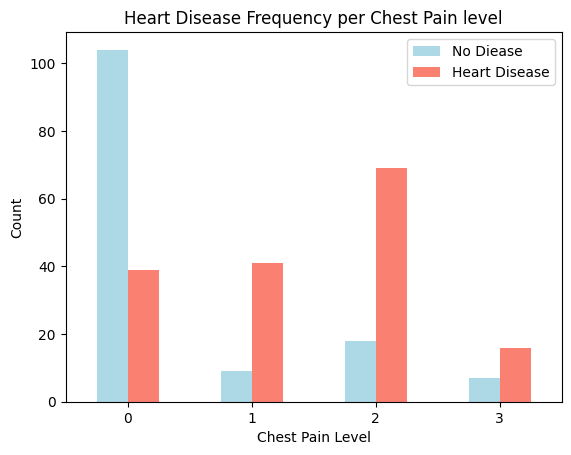

In [28]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', color=['lightblue', 'salmon']);

plt.title('Heart Disease Frequency per Chest Pain level')
plt.xlabel('Chest Pain Level')
plt.ylabel('Count')
plt.legend(['No Diease', 'Heart Disease'])
plt.xticks(rotation=0);

In [29]:
df.corr()['target'][:-1]

age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
thalach     0.421741
exang      -0.436757
ca         -0.391724
thal       -0.344029
Name: target, dtype: float64

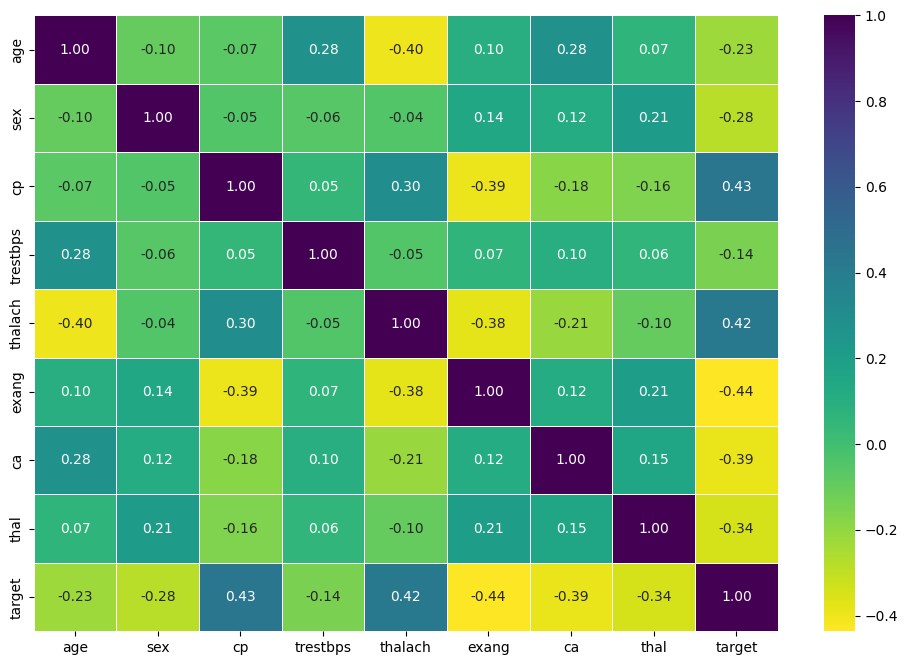

In [30]:
# visualization
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

In [31]:
df.head(2)


,age,sex,cp,trestbps,thalach,exang,ca,thal,target
0,63,1,3,145,150,0,0,1,1
1,37,1,2,130,187,0,0,2,1


In [32]:
# split features and labels
X = df.drop('target', axis=1)
y = df['target']

In [33]:

# Model Evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# split into training, testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 8), (61, 8), (242,), (61,))

In [35]:
# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
#Độ chính xác train
X_train_pre = model.predict(X_train)
train_data_acc = accuracy_score(X_train_pre, y_train)

In [37]:
print("data accuracy: ",train_data_acc)

data accuracy:  0.8140495867768595


In [38]:
#Độ chính xác test
X_test_pre = model.predict(X_test)
train_test_acc = accuracy_score(X_test_pre, y_test)

In [39]:
print("data accuracy: ",train_test_acc)

data accuracy:  0.8852459016393442


In [40]:
input_data = (60,1,0,130,132,1,2,3)
# thay đổi dữ liệu thành 1 mảng array
input_array = np.asarray(input_data)
#Định hình lại mảng numpy
input_data_reshaped = input_array.reshape(1,-1)

predict = model.predict(input_data_reshaped)
print(predict)

if (predict[0] == 0):
  print("No Heart")
else:
  print("Heart")

[0]
No Heart


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [47]:
import pickle

In [48]:
filename = 'trained_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [49]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.pkl', 'rb'))

In [50]:
input_data = (60,1,0,130,132,1,2,3)
# thay đổi dữ liệu thành 1 mảng array
input_array = np.asarray(input_data)
#Định hình lại mảng numpy
input_data_reshaped = input_array.reshape(1,-1)

predict = loaded_model.predict(input_data_reshaped)
print(predict)

if (predict[0] == 0):
  print("No Heart")
else:
  print("Heart")

[0]
No Heart


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
